# Linear Regression

## Import packages

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read data

In [7]:
data = pd.read_csv('new_diamonds.csv', dtype=float)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5.0,6.0,2.0,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,4.0,6.0,3.0,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,2.0,6.0,5.0,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,4.0,2.0,4.0,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,2.0,1.0,2.0,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5.0,7.0,3.0,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,2.0,7.0,3.0,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,3.0,7.0,3.0,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,4.0,3.0,2.0,61.0,58.0,2757.0,6.15,6.12,3.74


### Select x, y components

In [8]:
y_data = data.pop('price')
x_data = data

x_data = x_data.to_numpy()
y_data = y_data.to_numpy()


In [20]:
x_data.shape, y_data.shape

((53940, 9), (53940,))

## Generate Some images

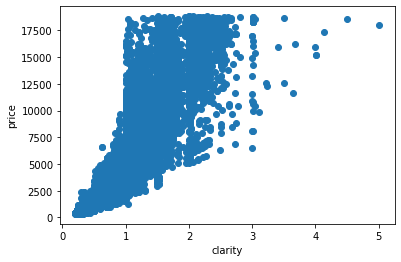

In [45]:
plt.scatter(x = x_data[:,0], y = y_data)
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

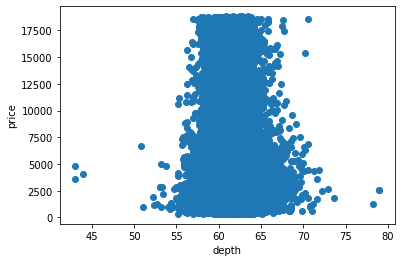

In [46]:
plt.scatter(x = x_data[:,4], y = y_data)
plt.xlabel('depth')
plt.ylabel('price')
plt.show()

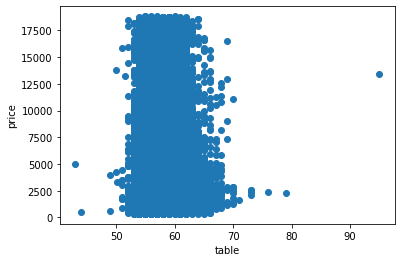

In [47]:
plt.scatter(x = x_data[:,5], y = y_data)
plt.xlabel('table')
plt.ylabel('price')
plt.show()

### Select data do training and testing

In [16]:
mask = np.random.rand(x_data.shape[0]) < 0.8

In [21]:
x_train = x_data[mask]
y_train = y_data[mask]

In [22]:
x_train.shape,y_train.shape

((43292, 9), (43292,))

In [23]:
x_test = x_data[~mask]
y_test = y_data[~mask]

In [24]:
x_test.shape, y_test.shape

((10648, 9), (10648,))

## Least Squares

In [152]:
def least_squares(A, b):
    x, res, rank, s = np.linalg.lstsq(A, b, rcond=None)
    return x

In [147]:
def linear_model(x: np.ndarray, y: np.ndarray):
    if x.shape[0] != y.shape[0]:
        raise Exception("Not same Dim")

    A = []
    for i in range(len(y)):
        ai = [1] + [x[i][j] for j in range(x.shape[1])]
        A.append(ai)

    b = y.copy()

    return np.array(A), b

In [148]:
A, b = linear_model(x_train, y_train)
A.shape, b.shape


((43292, 10), (43292,))

In [154]:
coef = least_squares(A, b)

In [175]:
np.argmin([np.abs(A[i]@coef - b[i])**2 for i in range(len(b))])

9830

In [176]:
A[9830]@coef , b[9830]

(5221.002550266248, 5221.0)